In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier


In [2]:
df = pd.read_csv('df.csv')
df

,Unnamed: 0,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,fico_range_low,fico_range_high,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,is_delinquent
0,218963,8800.0,8800.0,8800.0,36 months,15.61,307.70,30000.0,680.0,684.0,3677.140000,3677.14,2492.02,1185.12,574.0,570.0,1
1,1086540,17300.0,17300.0,17300.0,60 months,21.48,472.71,28080.0,675.0,679.0,15449.750000,15449.75,7248.86,8200.89,499.0,0.0,1
2,1105313,16800.0,16800.0,16800.0,60 months,19.48,440.26,80000.0,695.0,699.0,1815.580000,1815.58,686.65,1128.93,619.0,615.0,1
3,1053847,16000.0,16000.0,16000.0,36 months,5.32,481.84,85000.0,750.0,754.0,7653.180000,7653.18,5486.21,776.97,549.0,545.0,1
4,175573,10000.0,10000.0,9875.0,36 months,12.29,333.53,35035.0,680.0,684.0,5374.810000,5307.62,3987.91,1386.90,569.0,565.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1706429,8400.0,8400.0,8400.0,36 months,14.99,291.15,38684.0,670.0,674.0,9812.675465,9812.68,8400.00,1412.68,729.0,725.0,0
199996,1793080,24000.0,24000.0,24000.0,60 months,15.10,572.22,75000.0,720.0,724.0,34333.101034,34333.10,24000.00,10333.10,814.0,810.0,0
199997,190224,35000.0,35000.0,35000.0,60 months,18.25,893.54,155000.0,695.0,699.0,37288.040000,37288.04,35000.00,2288.04,689.0,685.0,0
199998,1847861,2800.0,2800.0,2800.0,36 months,13.11,94.50,49200.0,735.0,739.0,3181.949958,3181.95,2800.00,381.95,799.0,795.0,0


In [3]:
df.drop(columns= 'Unnamed: 0', inplace=True)

In [4]:
df1 = df.drop(columns= 'term')
df1

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,fico_range_low,fico_range_high,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_fico_range_high,last_fico_range_low,is_delinquent
0,8800.0,8800.0,8800.0,15.61,307.70,30000.0,680.0,684.0,3677.140000,3677.14,2492.02,1185.12,574.0,570.0,1
1,17300.0,17300.0,17300.0,21.48,472.71,28080.0,675.0,679.0,15449.750000,15449.75,7248.86,8200.89,499.0,0.0,1
2,16800.0,16800.0,16800.0,19.48,440.26,80000.0,695.0,699.0,1815.580000,1815.58,686.65,1128.93,619.0,615.0,1
3,16000.0,16000.0,16000.0,5.32,481.84,85000.0,750.0,754.0,7653.180000,7653.18,5486.21,776.97,549.0,545.0,1
4,10000.0,10000.0,9875.0,12.29,333.53,35035.0,680.0,684.0,5374.810000,5307.62,3987.91,1386.90,569.0,565.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,8400.0,8400.0,8400.0,14.99,291.15,38684.0,670.0,674.0,9812.675465,9812.68,8400.00,1412.68,729.0,725.0,0
199996,24000.0,24000.0,24000.0,15.10,572.22,75000.0,720.0,724.0,34333.101034,34333.10,24000.00,10333.10,814.0,810.0,0
199997,35000.0,35000.0,35000.0,18.25,893.54,155000.0,695.0,699.0,37288.040000,37288.04,35000.00,2288.04,689.0,685.0,0
199998,2800.0,2800.0,2800.0,13.11,94.50,49200.0,735.0,739.0,3181.949958,3181.95,2800.00,381.95,799.0,795.0,0


In [8]:
y = df1['is_delinquent']
X = df1.drop("is_delinquent", axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                                    test_size = 0.25, random_state=27)

In [10]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [11]:
tree_clf.feature_importances_

array([0.01014382, 0.09403548, 0.01917499, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.1841136 , 0.        , 0.        , 0.69253211])

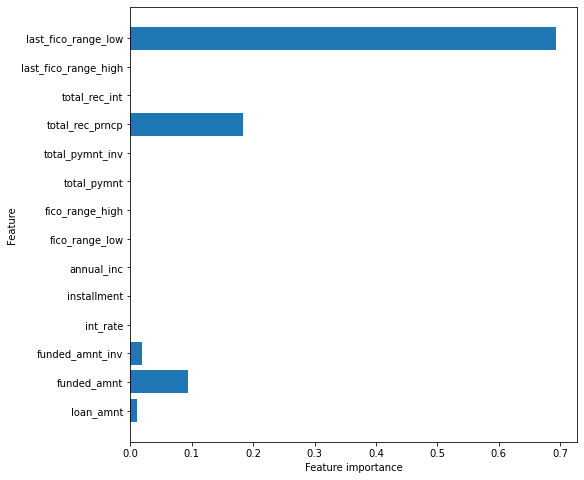

In [13]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

In [14]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [15]:
forest.score(X_train, y_train)


0.96276

In [17]:
forest.score(X_test, y_test)

0.96202

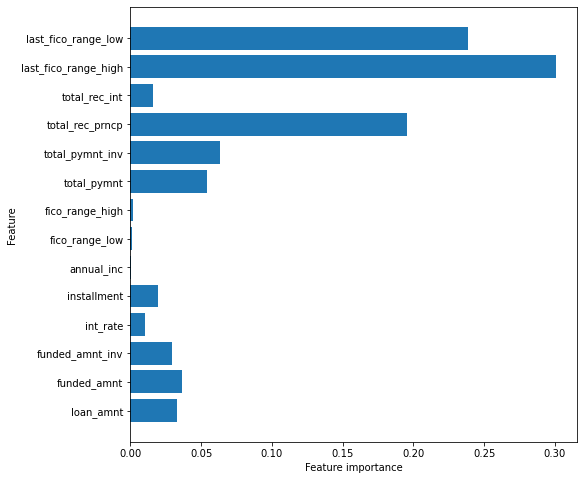

In [18]:
plot_feature_importances(forest)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96     25056
           1       0.95      0.97      0.96     24944

    accuracy                           0.96     50000
   macro avg       0.96      0.96      0.96     50000
weighted avg       0.96      0.96      0.96     50000



In [20]:
y_pred = forest.predict(X_test)
